#  Recommendation Engine


***A EVENT conducted by Analytics Vidhya***

## Problem Statment:

### The goal of this program is to automatically predict or identify the number of attempts the user is likely to solve a code with reasonable accuracy, given the problems details and the specialisation of the user.

### Import necesary libraries

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
from wordcloud import WordCloud

import warnings
warnings.simplefilter(action='ignore')

### Loading all data

In [2]:
train = pd.read_csv("train_submissions.csv")
problem = pd.read_csv("problem_data.csv")
user = pd.read_csv("user_data.csv")
test = pd.read_csv("test_submissions.csv")

### Analysis all data

In [3]:
train.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


In [4]:
train.shape

(155295, 3)

In [5]:
problem.head()

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [6]:
problem.shape

(6544, 4)

In [7]:
user.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498


In [8]:
user.shape

(3571, 11)

In [9]:
test.head()

,ID,user_id,problem_id
0,user_856_prob_5822,user_856,prob_5822
1,user_2642_prob_2334,user_2642,prob_2334
2,user_2557_prob_2920,user_2557,prob_2920
3,user_1572_prob_4598,user_1572,prob_4598
4,user_295_prob_6139,user_295,prob_6139


In [10]:
test.shape

(66555, 3)

### Combining the user and problem data to the train and test  on the basis of id

In [11]:
train = train.merge(problem, on='problem_id')
train = train.merge(user, on ='user_id')
train.head()

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_232,prob_6507,1,B,1000.0,strings,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
1,user_232,prob_5071,4,A,500.0,implementation,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
2,user_232,prob_703,2,A,500.0,"brute force,implementation",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
3,user_232,prob_3935,1,C,1000.0,"greedy,sortings",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
4,user_232,prob_164,2,A,500.0,"brute force,constructive algorithms,math",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935


In [12]:
train.shape

(155295, 16)

In [13]:
test = test.merge(problem, on ='problem_id')
test = test.merge(user, on ='user_id')
test.head()

,ID,user_id,problem_id,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_856_prob_5822,user_856,prob_5822,L,NaN,NaN,274,231,0,India,35,1503233908,393.062,362.959,intermediate,1422163139
1,user_856_prob_6173,user_856,prob_6173,B,1000.0,"implementation,sortings",274,231,0,India,35,1503233908,393.062,362.959,intermediate,1422163139
2,user_856_prob_5781,user_856,prob_5781,A,500.0,"implementation,math",274,231,0,India,35,1503233908,393.062,362.959,intermediate,1422163139
3,user_856_prob_3438,user_856,prob_3438,A,500.0,implementation,274,231,0,India,35,1503233908,393.062,362.959,intermediate,1422163139
4,user_856_prob_1868,user_856,prob_1868,A,500.0,"implementation,strings",274,231,0,India,35,1503233908,393.062,362.959,intermediate,1422163139


In [14]:
test.shape

(66555, 16)

### Checking Duplicated  values in train and test data

In [15]:
train.duplicated().sum(),test.duplicated().sum()

(0, 0)

### Differcent the test id column to a variable 

In [16]:
test_ID=test.pop('ID')

### Checking the null values in train and test data

In [17]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155295 entries, 0 to 155294
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    155295 non-null  object 
 1   problem_id                 155295 non-null  object 
 2   attempts_range             155295 non-null  int64  
 3   level_type                 154675 non-null  object 
 4   points                     126220 non-null  float64
 5   tags                       139868 non-null  object 
 6   submission_count           155295 non-null  int64  
 7   problem_solved             155295 non-null  int64  
 8   contribution               155295 non-null  int64  
 9   country                    117442 non-null  object 
 10  follower_count             155295 non-null  int64  
 11  last_online_time_seconds   155295 non-null  int64  
 12  max_rating                 155295 non-null  float64
 13  rating                     15

In [18]:
train.isna().sum()

user_id                          0
problem_id                       0
attempts_range                   0
level_type                     620
points                       29075
tags                         15427
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
dtype: int64

In [19]:
 test.isna().sum()

user_id                          0
problem_id                       0
level_type                     285
points                       12484
tags                          6612
submission_count                 0
problem_solved                   0
contribution                     0
country                      16162
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
dtype: int64

## Exploratory data analysis

### Data Visualizations

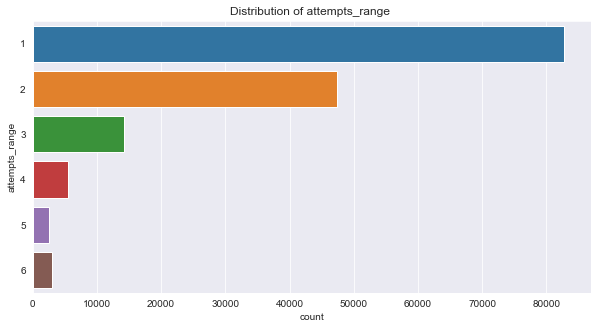

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(y='attempts_range', data=train).set_title('Distribution of attempts_range ')
sns.set(font_scale=1.5)

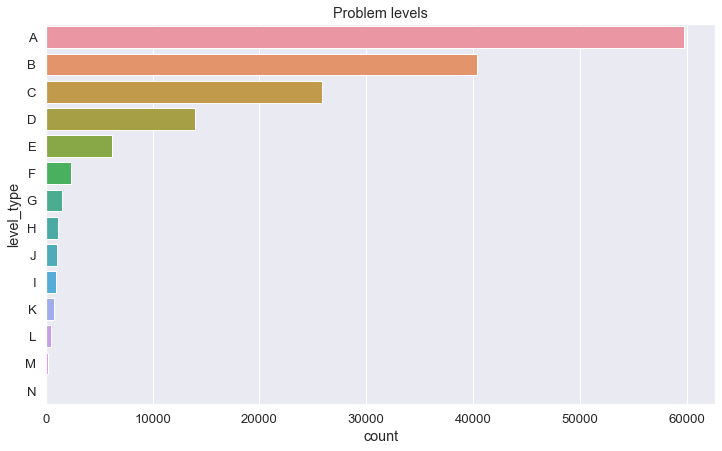

In [21]:
plt.figure(figsize=(12,7))
sns.set(font_scale=1.2)
sns.countplot(y='level_type', data=train, order=train.level_type.value_counts().index).set_title('Problem levels')
plt.show()

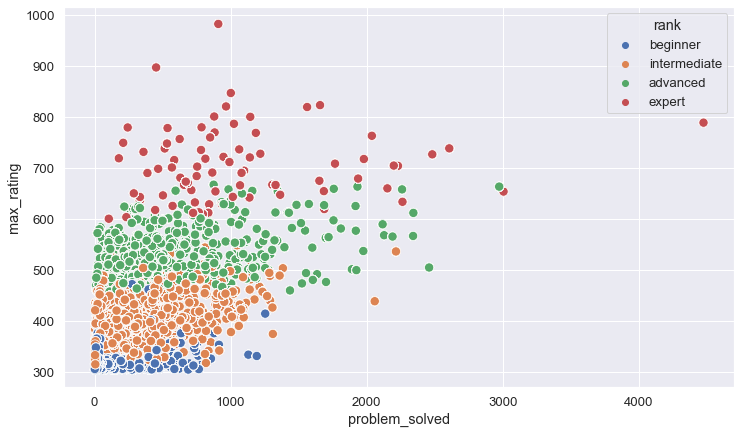

In [22]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='problem_solved', y='max_rating', hue='rank', data=train, s=85)
plt.show()

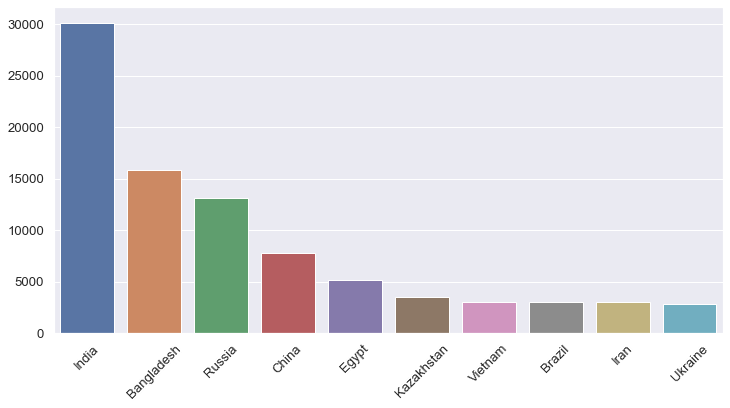

In [23]:
top10countries = train.country.value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top10countries.index, y=top10countries.values)
plt.xticks(rotation=45)
plt.show()

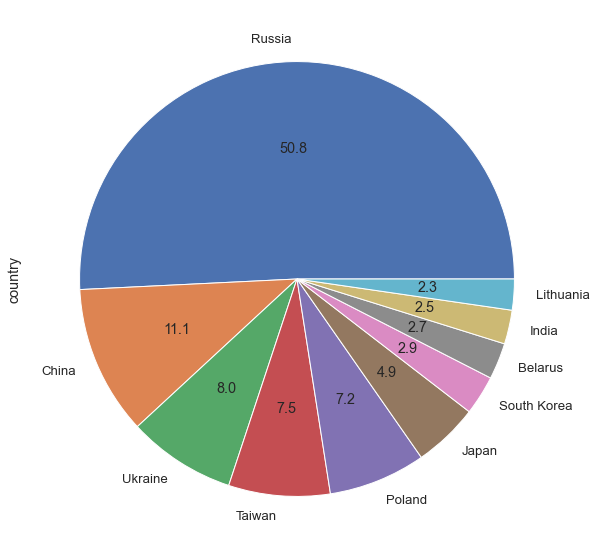

In [24]:
expert = train[['country','rank','level_type','attempts_range']][train['rank']=='expert']
exp = expert['country'].value_counts().head(10)
exp.plot.pie(y=exp.values, figsize=(10,10), autopct='%.1f')
plt.show()

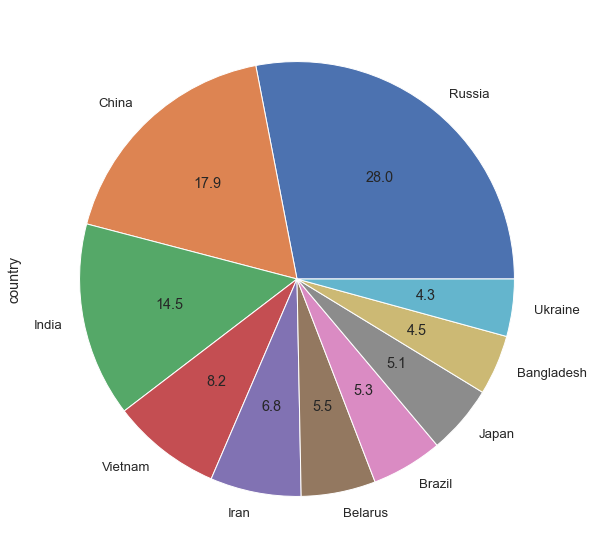

In [25]:
advanced = train[['country','rank','level_type','attempts_range']][train['rank']=='advanced']
adv = advanced['country'].value_counts().head(10)
adv.plot.pie(y=adv.values, figsize=(10,10), autopct='%.1f')
plt.show()

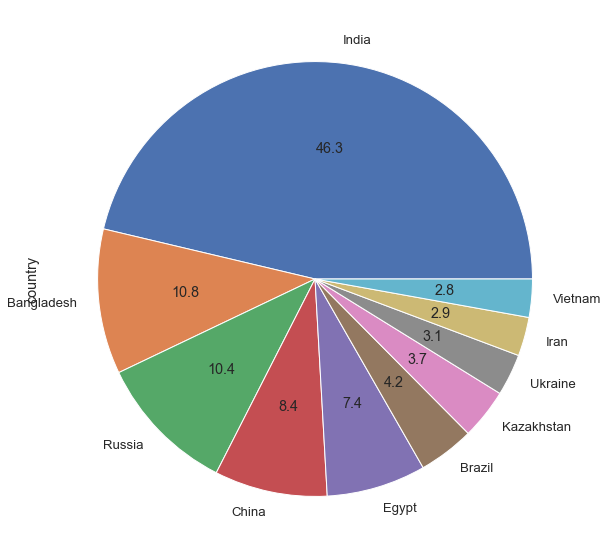

In [26]:
intermediate = train[['country','rank','level_type','attempts_range']][train['rank']=='intermediate']
inter = intermediate['country'].value_counts().head(10)
inter.plot.pie(y=inter.values, figsize=(10,10), autopct='%.1f')
plt.show()

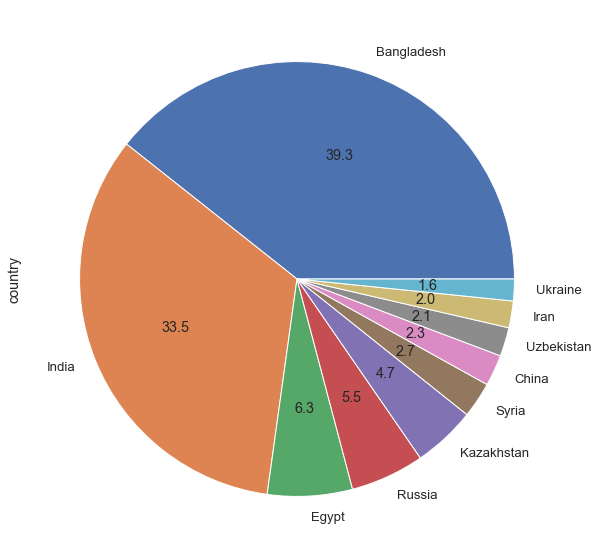

In [27]:
beginner = train[['country','rank','level_type','attempts_range']][train['rank']=='beginner']
beg = beginner['country'].value_counts().head(10)
beg.plot.pie(y=beg.values, figsize=(10,10), autopct='%.1f')
plt.show()

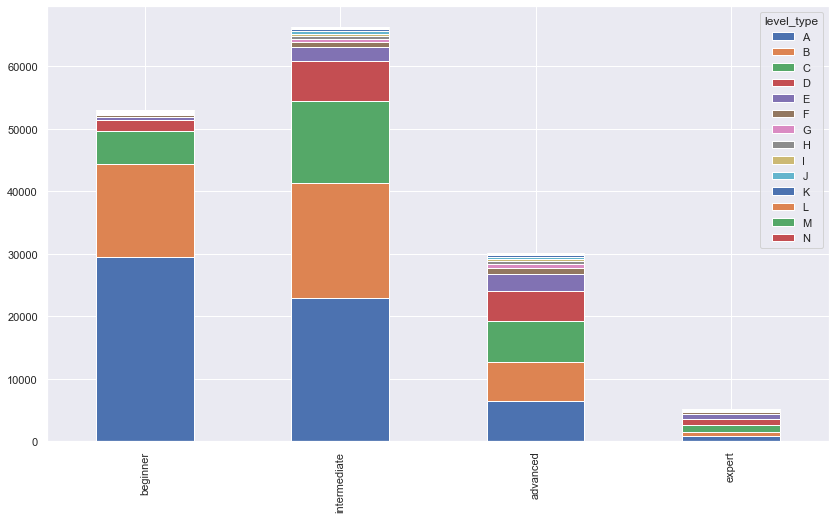

In [28]:
rank_prob_level = pd.DataFrame()
rank_prob_level['beginner'] = beginner.level_type.value_counts().sort_index()
rank_prob_level['intermediate'] = intermediate.level_type.value_counts().sort_index()
rank_prob_level['advanced'] = advanced.level_type.value_counts().sort_index()
rank_prob_level['expert'] = expert.level_type.value_counts().sort_index()

rank_prob_level = rank_prob_level.reset_index().rename(columns={'index':'level_type'})

sns.set(rc={'figure.figsize':(14,8)})
rank_prob_level.set_index('level_type').T.plot(kind='bar', stacked=True)
plt.show()

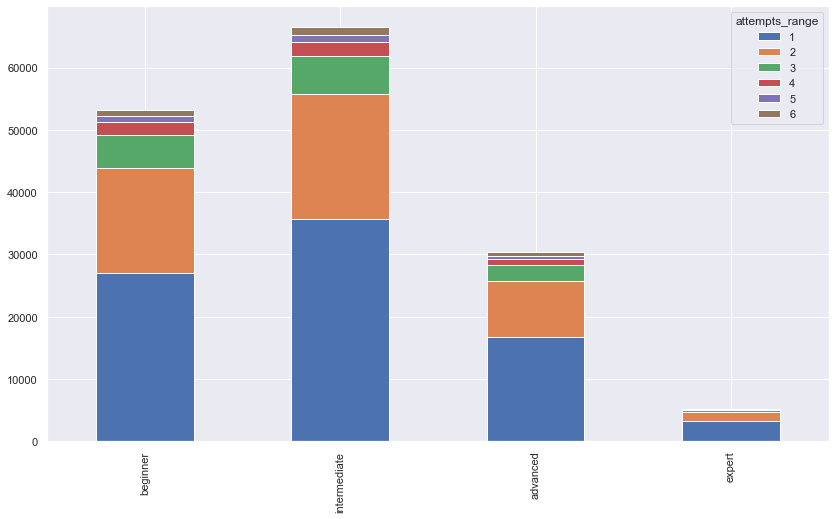

In [29]:
attempts_range = pd.DataFrame()
attempts_range['beginner'] = beginner.attempts_range.value_counts().sort_index()
attempts_range['intermediate'] = intermediate.attempts_range.value_counts().sort_index()
attempts_range['advanced'] = advanced.attempts_range.value_counts().sort_index()
attempts_range['expert'] = expert.attempts_range.value_counts().sort_index()

attempts_range = attempts_range.reset_index().rename(columns={'index':'attempts_range'})

sns.set(rc={'figure.figsize':(14,8)})
attempts_range.set_index('attempts_range').T.plot(kind='bar', stacked=True)
plt.show()

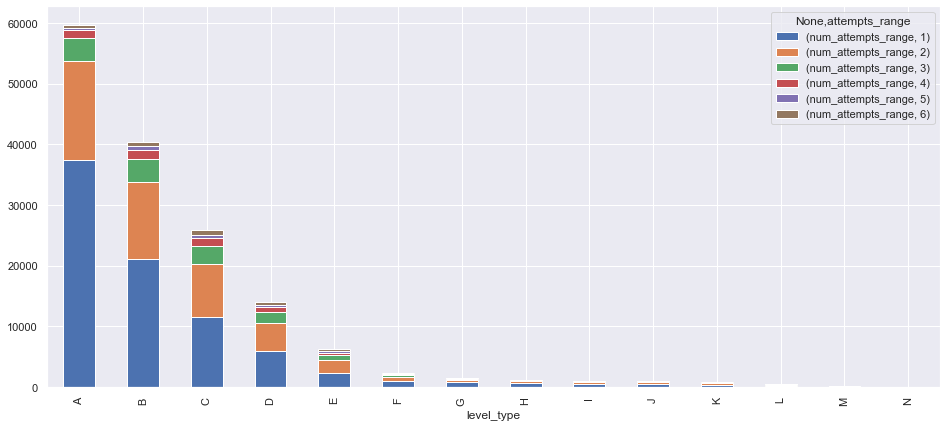

In [30]:
prob_lvl_attempts = train[['level_type', 'attempts_range']]
prob_lvl_attempts = pd.DataFrame(prob_lvl_attempts.groupby(['level_type','attempts_range'])['attempts_range'].agg('count'))
prob_lvl_attempts = prob_lvl_attempts.rename(columns={'attempts_range':'num_attempts_range'})
prob_lvl_attempts = prob_lvl_attempts.reset_index()

data = prob_lvl_attempts.set_index(['level_type', 'attempts_range'])
sns.set(rc={'figure.figsize':(16,7)})
data.unstack().plot(kind='bar', stacked=True)
plt.show()

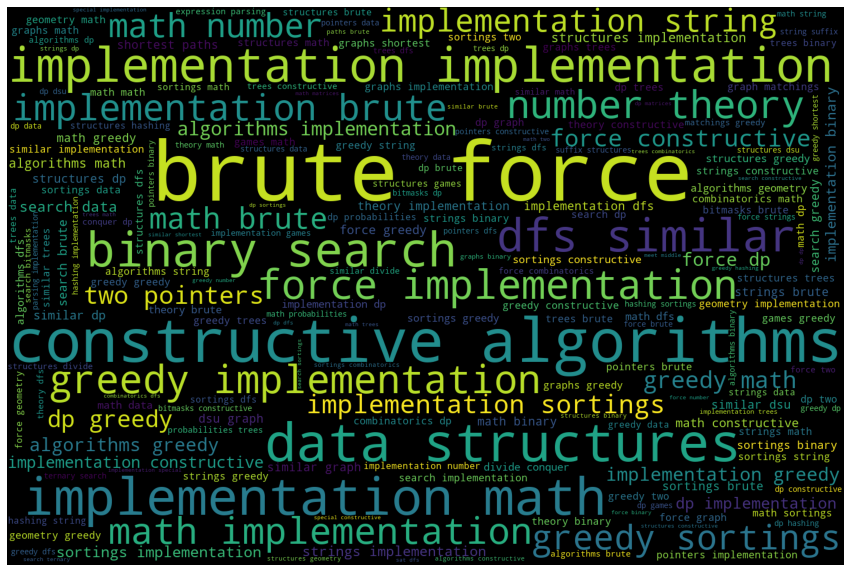

In [31]:
tags = train.tags.str.split(',')
tags = tags.dropna()
text = tags.explode().to_list()
wc = WordCloud(width=1500, height=1000).generate(' '.join(text))
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

## Feature engineering

### One hot encoding for tag column

In [32]:
train= pd.concat([train.drop('tags', axis=1), train.tags.str.get_dummies(sep=',').add_prefix('tag_')],1)
test= pd.concat([test.drop('tags', axis=1), test.tags.str.get_dummies(sep=',').add_prefix('tag_')],1)

In [33]:
train.shape,test.shape

((155295, 51), (66555, 50))

In [34]:
train.head()

,user_id,problem_id,attempts_range,level_type,points,submission_count,problem_solved,contribution,country,follower_count,...,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,user_232,prob_6507,1,B,1000.0,53,47,0,Bangladesh,1,...,0,0,0,0,0,0,1,0,0,0
1,user_232,prob_5071,4,A,500.0,53,47,0,Bangladesh,1,...,0,0,0,0,0,0,0,0,0,0
2,user_232,prob_703,2,A,500.0,53,47,0,Bangladesh,1,...,0,0,0,0,0,0,0,0,0,0
3,user_232,prob_3935,1,C,1000.0,53,47,0,Bangladesh,1,...,0,0,0,0,1,0,0,0,0,0
4,user_232,prob_164,2,A,500.0,53,47,0,Bangladesh,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
test.head()

,user_id,problem_id,level_type,points,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,...,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,user_856,prob_5822,L,NaN,274,231,0,India,35,1503233908,...,0,0,0,0,0,0,0,0,0,0
1,user_856,prob_6173,B,1000.0,274,231,0,India,35,1503233908,...,0,0,0,0,1,0,0,0,0,0
2,user_856,prob_5781,A,500.0,274,231,0,India,35,1503233908,...,0,0,0,0,0,0,0,0,0,0
3,user_856,prob_3438,A,500.0,274,231,0,India,35,1503233908,...,0,0,0,0,0,0,0,0,0,0
4,user_856,prob_1868,A,500.0,274,231,0,India,35,1503233908,...,0,0,0,0,0,0,1,0,0,0


### Checking percentage of null values

In [36]:
print(f'percentage:{(train.level_type.isna().sum()/train.shape[0]*100):.2f}%')
print(f'percentage:{(test.level_type.isna().sum()/test.shape[0]*100):.2f}%')

percentage:0.40%
percentage:0.43%


In [37]:
print(f'percentage:{(train.country.isna().sum()/train.shape[0]*100):.2f}%')
print(f'percentage:{(test.country.isna().sum()/test.shape[0]*100):.2f}%')

percentage:24.37%
percentage:24.28%


In [38]:
print(f'percentage:{(train.points.isna().sum()/train.shape[0]*100):.2f}%')
print(f'percentage:{(test.points.isna().sum()/test.shape[0]*100):.2f}%')

percentage:18.72%
percentage:18.76%


### Filling the null values

In [39]:
train["level_type"].fillna('A', inplace=True)
test["level_type"].fillna('A', inplace=True)

In [40]:
train["country"].fillna('India',inplace=True)
test["country"].fillna('India',inplace=True)

In [41]:
train["points"].fillna('500',inplace=True)
test["points"].fillna('500',inplace=True)

### One more time checking null values

In [42]:
print(train.isna().sum().any())
print(test.isna().sum().any())

False
False


###  Label encoding to categorical columns

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label = LabelEncoder()
train["level_type"]=label.fit_transform(train["level_type"])
test["level_type"]=label.fit_transform(test["level_type"])

In [45]:
train["country"]=label.fit_transform(train["country"])
test["country"]=label.fit_transform(test["country"])

In [46]:
train["rank"]=label.fit_transform(train["rank"])
test["rank"]=label.fit_transform(test["rank"])

### Deleting the prefix for user_id and problem_id columns 

In [47]:
train.user_id=train.user_id.str[5:].astype(int)
test.user_id=test.user_id.str[5:].astype(int)


train.problem_id=train.problem_id.str[5:].astype(int)
test.problem_id=test.problem_id.str[5:].astype(int)

### Converting the point column to integer

In [48]:
train.points=train.points.astype(int)
test.points=test.points.astype(int)

In [49]:
train.head()

,user_id,problem_id,attempts_range,level_type,points,submission_count,problem_solved,contribution,country,follower_count,...,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,232,6507,1,1,1000,53,47,0,5,1,...,0,0,0,0,0,0,1,0,0,0
1,232,5071,4,0,500,53,47,0,5,1,...,0,0,0,0,0,0,0,0,0,0
2,232,703,2,0,500,53,47,0,5,1,...,0,0,0,0,0,0,0,0,0,0
3,232,3935,1,2,1000,53,47,0,5,1,...,0,0,0,0,1,0,0,0,0,0
4,232,164,2,0,500,53,47,0,5,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
test.head()

,user_id,problem_id,level_type,points,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,...,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,856,5822,11,500,274,231,0,31,35,1503233908,...,0,0,0,0,0,0,0,0,0,0
1,856,6173,1,1000,274,231,0,31,35,1503233908,...,0,0,0,0,1,0,0,0,0,0
2,856,5781,0,500,274,231,0,31,35,1503233908,...,0,0,0,0,0,0,0,0,0,0
3,856,3438,0,500,274,231,0,31,35,1503233908,...,0,0,0,0,0,0,0,0,0,0
4,856,1868,0,500,274,231,0,31,35,1503233908,...,0,0,0,0,0,0,1,0,0,0


### Spliting the data

In [51]:
target=train.attempts_range
x=train.drop('attempts_range',axis=1)
y=test

## Model building

### Extreame gradiant boosting

In [52]:
from xgboost import XGBClassifier

xgb=XGBClassifier(max_depth=15,eta=0.10)
xgb.fit(x,target)

[17:33:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
pred1=xgb.predict(x)

In [54]:
from sklearn.metrics import f1_score

In [55]:
f1_score(target,pred1,average='weighted')

0.8657824441587462

In [56]:
pred2=xgb.predict(y)

### Submission file 

In [57]:
my_submission = pd.DataFrame({'ID':test_ID,'attempts_range': pred2})
my_submission.to_csv('submission.csv', index=False)